## Gamed Stopped

I recently slogged through the house financial services "Gamed Stopped" report (https://financialservices.house.gov/uploadedfiles/6.22_hfsc_gs.report_hmsmeetbp.irm.nlrf.pdf).  

The report essentially uncovers how the NSCC's application of **additional Excess Capital Premium charges** to Robinhood somehow "surprised" the risk department at Robinhood, forcing them to recalculate what their NSCC (or maybe even OCC) margin requirements were going to be as volatility exploded in the meme stocks.  

The description of these events seems like some weird combination of scary and comical. 
* Robinhood is clueless, and 
* the NSCC is clueless that Robinhood is clueless.


In any case, this made me look into how the NSCC calculates its **Capital Premium charge**.  It's really not that complicated.  They essentially run a 2/99 VaR on each customer of a clearing member - like Robinhood - and make sure that *the 2/99 VaR result is not greater than the customer's equity* (or Net Liquidating Value if there are options in the account).  
Robinhood certainly was letting all of their customers buy stock on Reg-T, regardless of the stock.  So, the algebraic question becomes:  

<pre>What annualized volatility must you input into the 2/99 VaR formula,<br> so that a stock's 2/99 VaR calculation is greater than 50% (Reg-T)? </pre> 

Or:  
```
dev_99 = 2.32635  # num_standard_deviations_at_99_percent  
days_of_var = 2  
trading_days_in_year = 252  
reg_t_margin = 0.50  

square_root(days_of_var/trading_days) * annualized_volatility * dev_99 >= reg_t_margin  

annualized_volatility  = reg_t_margin / ( (days_of_var/trading_days)**.5  * dev_99 )  
annualized_volatility = 2.41 (or 241%)
```
And that's exactly what happened!  

Look below at the history chart of 10-day-average implied volatility of GME during January 2021.  GME vol climbs over 250% on Jan 25th, 2021 and then climbs over 700% on Jan 27th, 2021.  

See the image below of historical Implied Vol for GME from Jan to March 2021
 

(If you want to see the web page where the volatility history came from, its here: https://www.alphaquery.com/stock/GME/volatility-option-statistics/10-day/iv-mean .  )

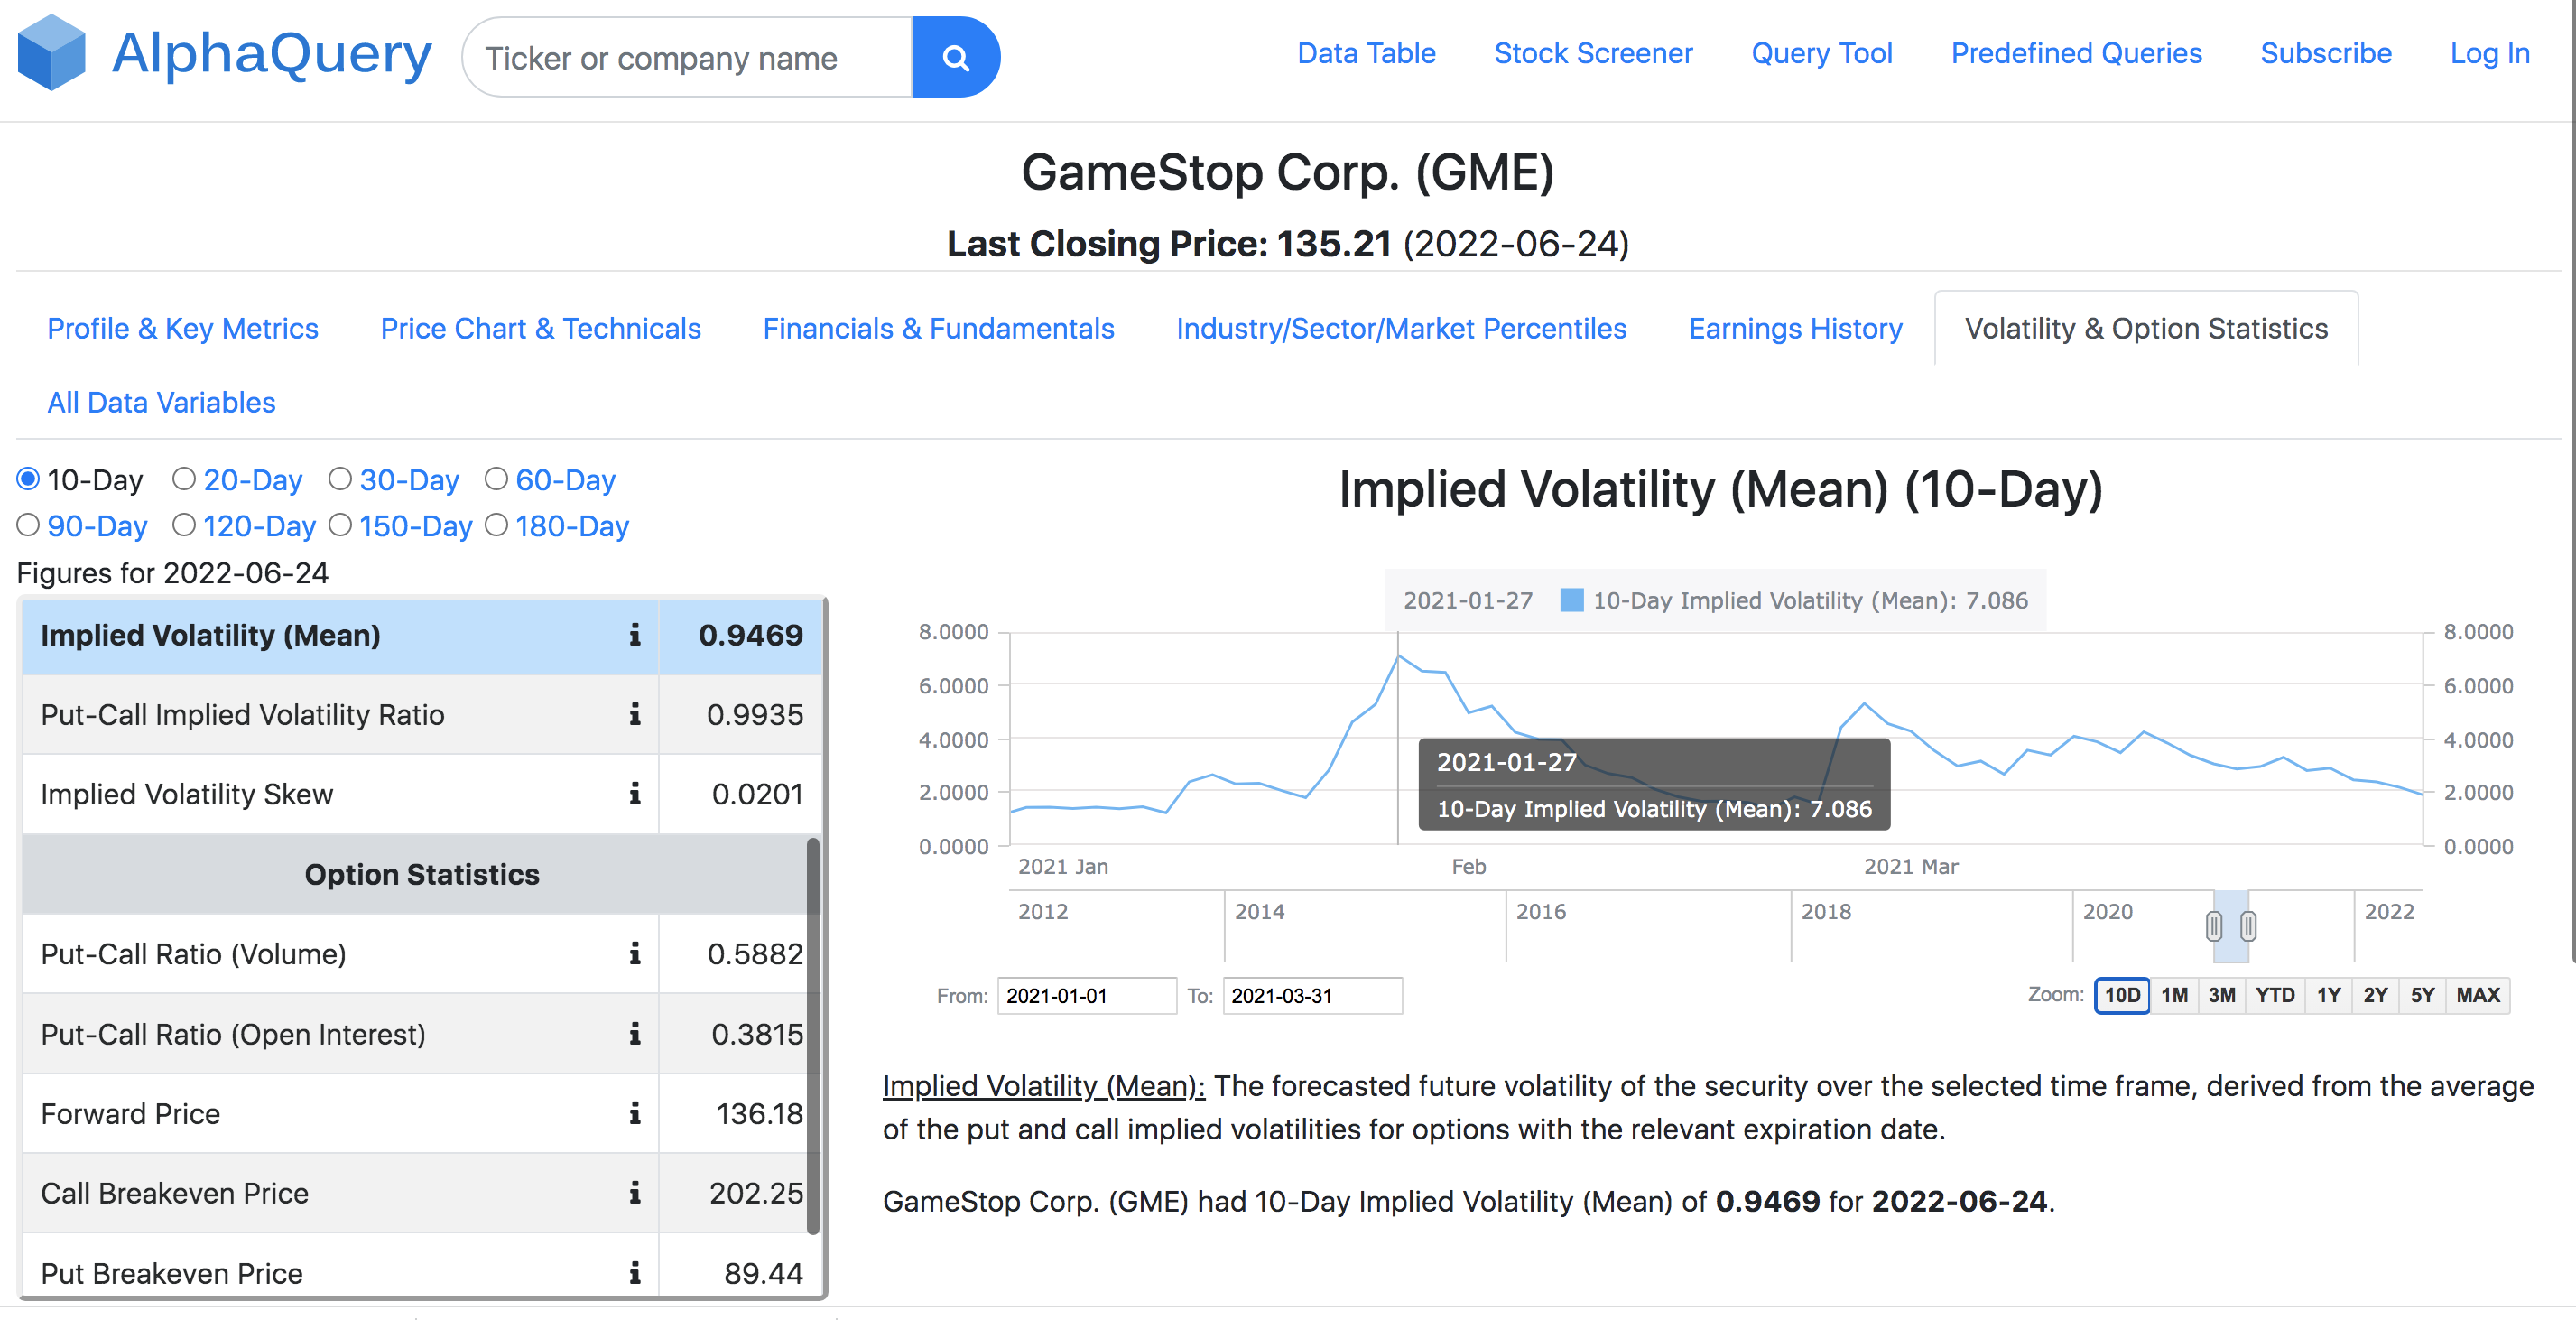

In [2]:
from IPython.display import Image
Image("gme_implied_vol.png")

### Find the annualized standard deviation such that a 2/99 VaR equals 50%

___
Find the value $ a $, which is the **annualized standard deviation** of a stock, such that the **2/99 VaR for the stock is >= Reg-T Margins of 50%**. 

Once the 2/99 VaR excedes the Reg-T margin for a stock, the NSCC will start assessing an Excess Capital Premium on the clearing member's customer account.

let:

$ m = 0.50 $ &nbsp; &nbsp; &nbsp; &nbsp; Reg T Margin percent</pre>  
$ d = 2.32634 $ &nbsp; Number of stardard deviations at 99% confidence level  
$ t = 2/252 $ &nbsp; &nbsp; &nbsp; &nbsp; Days_Of_VaR / Trading_Days  

Equate margin requirements ($m$) with a VaR ($a * d * t^{1/2}$)  
$ m = a * d * t^{1/2} $  

Solve for the standard deviation ($a$)  
$ a = m / ( d * t^{1/2} ) $
___

In [1]:
import scipy.stats as ss
days_of_var = 2
trading_days_in_year = 252

d = ss.norm.ppf(.99)  # this provides the number of standard deviations a 99% confidence
t = days_of_var / trading_days_in_year  # portion of year for VaR
m = 0.50  # Reg T margins
a = m / (d * t**.5)
print(f"The Annualized volatility to produce a 2/99 VaR of 50% = {round(a*100)}%")


The Annualized volatility to produce a 2/99 VaR of 50% = 241%
